## Author
Jarosław Wełeszczuk

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt 

from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, make_scorer

import seaborn as sns

In [2]:
caly_df=pd.read_csv('Prepared_geko_data.csv',sep=';')

In [3]:
caly_df

,time,temperatur,Sleep poze,Sleep position,splashing reaction,splashing reaction 2,touch reaction,behaviour on hand,after putting away,SPz | S shape,...,TR | runs,TR | moves,BoH | no movement,BoH | runs,BoH | jumps,BoH | moves,ApA | runs,ApA | hides,ApA | moves,ApA | stayes in place
0,10,23,straight,in the hideout,No Movement,does not licks,No Movement,No Movement,stays in place,0,...,0,0,1,0,0,0,0,0,0,1
1,10,23,U shape,in the hideout,moves the head,does not licks,Runs,Runs,stays in place,0,...,1,0,0,1,0,0,0,0,0,1
2,10,23,active,active,No Movement,does not licks,No Movement,jumps,Runs,0,...,0,0,0,0,1,0,1,0,0,0
3,10,23,active,active,moves,licks,Runs,Runs,Runs,0,...,1,0,0,1,0,0,1,0,0,0
4,10,23,straight,in the hideout,moves the head,licks,Runs,No Movement,stays in place,0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,16,26,straight,on coconut,moves the head,licks,No Movement,Runs,stays in place,0,...,0,0,0,1,0,0,0,0,0,1
2063,16,26,straight,back wall,moves the head,does not licks,No Movement,jumps,stays in place,0,...,0,0,0,0,1,0,0,0,0,1
2064,16,26,active,active,moves,licks,moves,Runs,moves,0,...,0,1,0,1,0,0,0,0,1,0
2065,16,26,active,active,moves,licks,moves,moves,moves,0,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

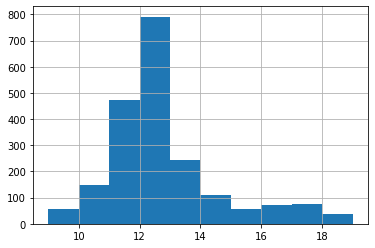

In [4]:
caly_df['time'].hist()

<AxesSubplot:>

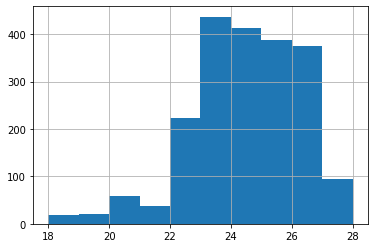

In [5]:
caly_df['temperatur'].hist()

In [6]:
caly_label=caly_df['after putting away']

In [7]:
del caly_df['Sleep poze']
del caly_df['Sleep position']
del caly_df['splashing reaction']
del caly_df['splashing reaction 2']
del caly_df['touch reaction']
del caly_df['behaviour on hand']
del caly_df['after putting away']

In [8]:
del caly_df['ApA | runs']
del caly_df['ApA | hides']
del caly_df['ApA | moves']
del caly_df['ApA | stayes in place']

In [9]:
caly_label

0       stays in place
1       stays in place
2                 Runs
3                 Runs
4       stays in place
             ...      
2062    stays in place
2063    stays in place
2064             moves
2065             moves
2066             hides
Name: after putting away, Length: 2067, dtype: object

In [10]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   time                  2067 non-null   int64
 1   temperatur            2067 non-null   int64
 2   SPz | S shape         2067 non-null   int64
 3   SPz | U shape         2067 non-null   int64
 4   SPz | active          2067 non-null   int64
 5   SPz | straight        2067 non-null   int64
 6   SPs | active          2067 non-null   int64
 7   SPs | back wall       2067 non-null   int64
 8   SPs | front wall      2067 non-null   int64
 9   SPs | in the hideout  2067 non-null   int64
 10  SPs | left wall       2067 non-null   int64
 11  SPs | on coconut      2067 non-null   int64
 12  SPs | right wall      2067 non-null   int64
 13  SR | no movement      2067 non-null   int64
 14  SR | moves            2067 non-null   int64
 15  SR | moves the head   2067 non-null   int64
 16  SR2 | 

In [11]:
param_grid = {
    'criterion':['friedman_mse','mse'],#
    'min_samples_split':range(5,31,15), #
    'min_samples_leaf': range(5,31,15),     #
    'max_leaf_nodes':range(5,36,10), #
    'max_depth':list(range(5, 36,10)), #
    'n_estimators':[100],
    'learning_rate':[0.1,0.4],#
    'max_features':['auto','sqrt','log2',None],
    'min_weight_fraction_leaf':[0.0,0.2],
    'min_impurity_decrease':[0.0,0.2]
}

In [12]:
f1 = make_scorer(f1_score , average='macro')

In [14]:
dt_1 = GradientBoostingClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 4096 candidates, totalling 8192 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.1, 0.4],
                         'max_depth': [5, 15, 25, 35],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': range(5, 36, 10),
                         'min_impurity_decrease': [0.0, 0.2],
                         'min_samples_leaf': range(5, 31, 15),
                         'min_samples_split': range(5, 31, 15),
                         'min_weight_fraction_leaf': [0.0, 0.2],
                         'n_estimators': [100]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [15]:
grid_search_1.best_score_ 

0.2715840594827964

In [16]:
grid_search_1.best_estimator_

GradientBoostingClassifier(learning_rate=0.4, max_depth=5, max_features='log2',
                           max_leaf_nodes=5, min_samples_leaf=5,
                           min_samples_split=5, random_state=42)

In [18]:
grid_search_1.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.4,
 'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100}

In [11]:
param_grid = {
    'criterion':['friedman_mse'],#
    'min_samples_split':range(2,15,3), # 
    'min_samples_leaf': range(2,15,3), #     
    'max_leaf_nodes':range(2,15,2),  #
    'max_depth':list(range(2, 11,2)), # 
    'n_estimators':[100], #tbd
    'learning_rate':[0.3,0.4,0.5],#
    'max_features':['log2'], #
    'min_weight_fraction_leaf':[0.0,0.1,0.2], #
    'min_impurity_decrease':[0.0,0.1] #
}

In [16]:
dt_1 = GradientBoostingClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 5, verbose = 2, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 15750 candidates, totalling 31500 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=5,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.3, 0.4, 0.5],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['log2'],
                         'max_leaf_nodes': range(2, 15, 2),
                         'min_impurity_decrease': [0.0, 0.1],
                         'min_samples_leaf': range(2, 15, 3),
                         'min_samples_split': range(2, 15, 3),
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                         'n_estimators': [100]},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

In [17]:
grid_search_1.best_score_

0.2757802244698936

In [18]:
grid_search_1.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, max_depth=6, max_features='log2',
                           max_leaf_nodes=10, min_impurity_decrease=0.1,
                           min_samples_leaf=2, random_state=42)

In [19]:
grid_search_1.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100}

In [20]:
param_grid = {
    'criterion':['friedman_mse'],
    'min_samples_split':range(2,5,1), #  
    'min_samples_leaf': range(2,5,1), # 
    'max_leaf_nodes':range(8,13,1),  
    'max_depth':list(range(4, 8, 1)), # 
    'n_estimators':[100], #tbd
    'learning_rate':[0.5,0.6,0.7], #
    'max_features':['log2'],  #
    'min_weight_fraction_leaf':[0.0,0.1], # 
    'min_impurity_decrease':[0.1,0.2,0.3] # 
}

In [22]:
dt_1 = GradientBoostingClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 5, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 3240 candidates, totalling 6480 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=5,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.5, 0.6, 0.7],
                         'max_depth': [4, 5, 6, 7], 'max_features': ['log2'],
                         'max_leaf_nodes': range(8, 13),
                         'min_impurity_decrease': [0.1, 0.2, 0.3],
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(2, 5),
                         'min_weight_fraction_leaf': [0.0, 0.1],
                         'n_estimators': [100]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [23]:
grid_search_1.best_score_

0.27656508966291216

In [24]:
grid_search_1.best_estimator_

GradientBoostingClassifier(learning_rate=0.7, max_depth=5, max_features='log2',
                           max_leaf_nodes=12, min_impurity_decrease=0.1,
                           min_samples_leaf=4, random_state=42)

In [25]:
grid_search_1.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.7,
 'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 12,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100}

In [27]:
param_grid = {
    'criterion':['friedman_mse'],#
    'min_samples_split':range(2,5,1), #
    'min_samples_leaf': range(3,7,1), # 
    'max_leaf_nodes':range(11,17,1), #  
    'max_depth':list(range(4, 6, 1)), # 
    'n_estimators':[100], #tbd
    'learning_rate':[0.7,0.8,0.9], #
    'max_features':['log2'],  #
    'min_weight_fraction_leaf':[0.0], # 
    'min_impurity_decrease':[0, 0.1, 0.2] # 
}

In [28]:
dt_1 = GradientBoostingClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 5, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 1296 candidates, totalling 2592 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=5,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.7, 0.8, 0.9], 'max_depth': [4, 5],
                         'max_features': ['log2'],
                         'max_leaf_nodes': range(11, 17),
                         'min_impurity_decrease': [0, 0.1, 0.2],
                         'min_samples_leaf': range(3, 7),
                         'min_samples_split': range(2, 5),
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [29]:
grid_search_1.best_score_

0.28162851949378975

In [30]:
grid_search_1.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.9,
 'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 16,
 'min_impurity_decrease': 0.2,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100}

In [33]:
param_grid = {
    'criterion':['friedman_mse'],#
    'min_samples_split':[2], #
    'min_samples_leaf': [4], # 
    'max_leaf_nodes':range(15,20,1), #  
    'max_depth':list(range(4, 10, 1)), # 
    'n_estimators':[100,500], #tbd
    'learning_rate':[0.9,1], #
    'max_features':['log2'],  #
    'min_weight_fraction_leaf':[0.0], # 
    'min_impurity_decrease':[0.2,0.3,0.4] # 
}

In [34]:
dt_1 = GradientBoostingClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 5, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 360 candidates, totalling 720 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=5,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.9, 1],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['log2'],
                         'max_leaf_nodes': range(15, 20),
                         'min_impurity_decrease': [0.2, 0.3, 0.4],
                         'min_samples_leaf': [4], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100, 500]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [35]:
grid_search_1.best_score_

0.28162851949378975

In [36]:
grid_search_1.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.9,
 'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 16,
 'min_impurity_decrease': 0.2,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100}

In [13]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]

for train, test in kfold.split(caly_df, caly_label):
    
    RF_1 =GradientBoostingClassifier(learning_rate=0.9, max_depth=5, max_features='log2',
                           max_leaf_nodes=16, min_samples_leaf=4, min_impurity_decrease=0.2,
                           random_state=42, min_samples_split=2,min_weight_fraction_leaf=0,)
    
    RF_1.fit(caly_df.iloc[train],
             caly_label.iloc[train])
    predykcje=RF_1.predict(caly_df.iloc[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label.iloc[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    
    sredni_blad=f1_score(caly_label.iloc[test], predykcje, average='macro')
    wart_1.append(sredni_blad)
    licznik+=1

In [14]:
wart_1

[0.22582556347844643,
 0.23577455719597085,
 0.22378490550957164,
 0.21685067537823222,
 0.2272648868914543]

In [15]:
sum(wart_1)/len(wart_1)

0.22590011769073506

In [16]:
confusion_matrix(dane_do_zapisu_1['obs'], dane_do_zapisu_1['pred'], labels=list(pd.unique(caly_label)))

array([[1037,   65,   51,   17],
       [ 300,   17,   22,    5],
       [ 285,   22,   25,   12],
       [ 169,   16,   15,    9]], dtype=int64)

In [17]:
class_names = RF_1.classes_


In [18]:
cf_matrix=confusion_matrix(dane_do_zapisu_1[dane_do_zapisu_1['Fold']==5]['obs'],
                           dane_do_zapisu_1[dane_do_zapisu_1['Fold']==5]['pred'],
                           labels=class_names)

Text(0.5, 1.0, 'GradientBoosting - after putting away')

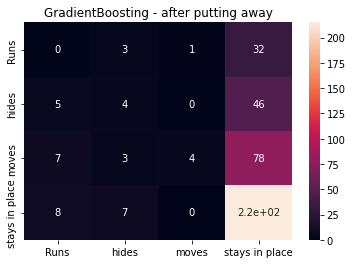

In [19]:
x_axis_labels = class_names
y_axis_labels = class_names

# create seabvorn heatmap with required labels
ax=sns.heatmap(cf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True)
ax.set_title('GradientBoosting - after putting away')

In [46]:
#dane_do_zapisu_1.to_csv('Geko_GB__after putting away v_2 .csv',sep=',')

In [ ]:
RF_1

In [25]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [21]:
RF_1.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                             max_features='log2', max_leaf_nodes=16,
                             min_impurity_decrease=0.2, min_samples_leaf=4,
                             min_weight_fraction_leaf=0,
                             random_state=RandomState(MT19937) at 0x25505ADD840),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                             max_features='log2', max_leaf_nodes=16,
                             min_impurity_decrease=0.2, min_samples_leaf=4,
                             min_weight_fraction_leaf=0,
                             random_state=RandomState(MT19937) at 0x25505ADD840),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                             max_features='log2', max_leaf_nodes=16,
                             min_impurity_decrease=0.2, min_samples_leaf=4,
                             min_weight_fraction_leaf=0,
                          

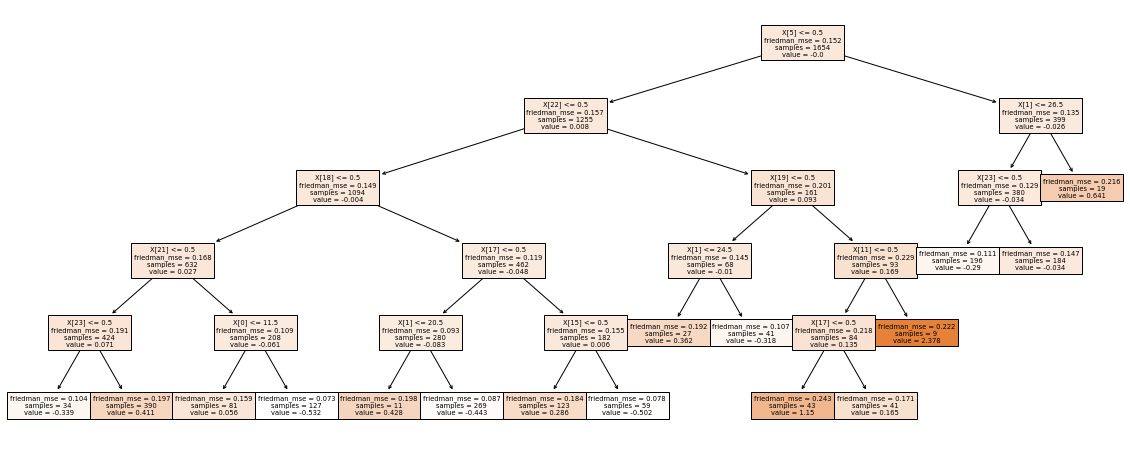

In [26]:
plt.figure(figsize=(20,8))
plot_tree(RF_1.estimators_[0][0], filled=True)
plt.show()

In [28]:
RF_1.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                             max_features='log2', max_leaf_nodes=16,
                             min_impurity_decrease=0.2, min_samples_leaf=4,
                             min_weight_fraction_leaf=0,
                             random_state=RandomState(MT19937) at 0x25505ADD840),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                             max_features='log2', max_leaf_nodes=16,
                             min_impurity_decrease=0.2, min_samples_leaf=4,
                             min_weight_fraction_leaf=0,
                             random_state=RandomState(MT19937) at 0x25505ADD840),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                             max_features='log2', max_leaf_nodes=16,
                             min_impurity_decrease=0.2, min_samples_leaf=4,
                             min_weight_fraction_leaf=0,
                          